# Assignment
- [ ] Pascal VOC 데이터셋을 학습해 세그멘테이션을 하는 UNet 모델 만들기
- [ ] Tensorboard.dev를 통해 학습 결과 공유하기
- [ ] CAM 기법으로 학습된 결과 확인하기

# 데이터 불러오기

In [1]:
!pip install datasets huggingface_hub

In [1]:
import datasets
from datasets import load_dataset

dataset = load_dataset('nateraw/pascal-voc-2012', split='train')

Using custom data configuration nateraw___pascal-voc-2012-c68607404d4811ac
Reusing dataset parquet (/aiffel/.cache/huggingface/datasets/parquet/nateraw___pascal-voc-2012-c68607404d4811ac/0.0.0/9296ce43568b20d72ff8ff8ecbc821a16b68e9b8b7058805ef11f06e035f911a)


# 데이터셋 분석

In [2]:
print(type(dataset))

<class 'datasets.arrow_dataset.Dataset'>


In [3]:
print(dataset)

Dataset({
    features: ['image', 'mask'],
    num_rows: 2913
})


In [4]:
print(len(dataset['image']))

2913


In [5]:
print(type(dataset['image'][0]))

<class 'dict'>


In [6]:
print(dataset['image'][0])

{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x01\x19\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x9

In [7]:
import io
from PIL import Image

image_bytes = io.BytesIO(dataset['image'][1]['bytes'])
image = Image.open(image_bytes)

(500, 375)


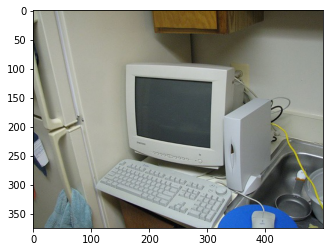

In [8]:
import matplotlib.pyplot as plt

print(image.size)
plt.imshow(image)
plt.show()

In [9]:
import tensorflow as tf

image_tensor = tf.convert_to_tensor(image, dtype='float32')
print(image_tensor.shape)
print(image_tensor.dtype)

(375, 500, 3)
<dtype: 'float32'>


In [10]:
import numpy as np

def bytes_to_numpy(bytes_string, image_size=(280, 280)):
    image_bytes = io.BytesIO(bytes_string)
    image = Image.open(image_bytes).resize(image_size)
    return np.array(image)

In [11]:
print(type(dataset['mask']))

<class 'list'>


In [12]:
print(dataset['mask'][0])

{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x00\x01\x19\x08\x02\x00\x00\x00\xeen@\x81\x00\x00\t\xcaIDATx\x9c\xed\xdd\xeb\x91\xa3F\x1b\x80Q\xadk\x03Q(\x13\xca\x846\xa1(\x14\x85\xe2\x1f\xfa>y\n\x104\xd0\x97\xb7\x9bsj\xcbek\xe7"#x\xd4jn\xb7\x1b\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0c\xefO\xeb\'@\xaf\x9e\xcf\xc7\xe4\x91\xfb\xfd\xab\xc1\xf3\x00\x96\xfc\xd3\xfa\t\xd0\xa5y\xd9?=\x084!\xee\xec\xb6\x12q}\x87 \xc4\x9d}6\xf3\xad\xef\x10\x81\xb8\xb3\xc3<\xdc?\xf7\xaf\x9f\xd9T\xbb\xbeCs\xe2\xceq\xef\xac\xcf\xfb\x0e\xb4%\xee\xa4\x9a\x8c\xc7

In [13]:
mask_img = bytes_to_numpy(dataset['mask'][0]['bytes'])

In [14]:
print(mask_img.shape)

(280, 280, 3)


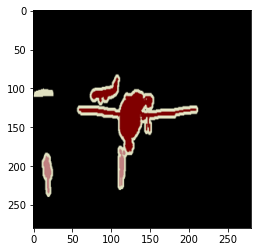

In [15]:
plt.imshow(tf.cast(mask_img, 'uint8'))
plt.show()

# 데이터셋 만들기

In [16]:
#reference: https://d2l.ai/chapter_computer-vision/semantic-segmentation-and-dataset.html

VOC_COLORMAP = np.array([[0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0],
                [0, 0, 128], [128, 0, 128], [0, 128, 128], [128, 128, 128],
                [64, 0, 0], [192, 0, 0], [64, 128, 0], [192, 128, 0],
                [64, 0, 128], [192, 0, 128], [64, 128, 128], [192, 128, 128],
                [0, 64, 0], [128, 64, 0], [0, 192, 0], [128, 192, 0],
                [0, 64, 128]])

VOC_CLASSES = ['background', 'aeroplane', 'bicycle', 'bird', 'boat',
               'bottle', 'bus', 'car', 'cat', 'chair', 'cow',
               'diningtable', 'dog', 'horse', 'motorbike', 'person',
               'potted plant', 'sheep', 'sofa', 'train', 'tv/monitor']

border = np.array([224, 224, 192])
num_classes = len(VOC_CLASSES)

In [24]:
def convert_to_int_labels(image_numpy):
    original_shape = image_numpy.shape
    image_numpy = image_numpy.reshape(-1, 3)
    labels = np.zeros(image_numpy.shape[0])
    for i, rgb in enumerate(image_numpy):
        if (rgb == border).all():
            labels[i] = 0.
        else:
            colormap_matched = (rgb == VOC_COLORMAP).all(axis=-1)
            labels[i] = np.argmax(colormap_matched.astype('float32'))
    return labels.reshape(original_shape[:-1])

def to_image_array(row):
    new_row = {}
    new_row['image'] = bytes_to_numpy(row['image']['bytes'])
    new_row['mask'] = bytes_to_numpy(row['mask']['bytes'])
    new_row['mask'] = convert_to_int_labels(new_row['mask'])
    return row

In [ ]:
dataset = dataset.map(to_image_array, num_proc=8)

In [ ]:
dataset = dataset.to_tf_dataset(columns=['image'],
                                label_cols=['mask'],
                                batch_size=256,
                                shuffle=False)

In [ ]:
for images, masks in dataset:
    print(images[0].shape)
    print(images[0].dtype)
    print(masks[0].shape)
    print(masks[0].dtype)
    break

# UNet 모델 훈련

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

down_samplings = []

inputs = keras.Input(shape=(280, 280, 3))

x = inputs
for num_filters in [64, 128, 256, 512]:
    x = layers.Conv2D(num_filters, 3, activation='relu')(x)
    x = layers.Conv2D(num_filters, 3, activation='relu')(x)
    down_samplings.append(x)
    x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(1024, 3)(x)
x = layers.Conv2D(1024, 3)(x)

for num_filters in [512, 256, 128, 64]:
    x = layers.Conv2DTranspose(num_filters, strides=2, padding='same', activation='relu')(x)
    donw_conv = down_samplings.pop()
    x = layers.Concatenate(axis=-1)([down_conv, x])
    x = layers.Conv2D(num_filters, activation='relu')(x)
    x = layers.Conv2D(num_filters, activation='relu')(x)

outputs = layers.Conv2D(num_classes, 1, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint('UNet_Pascal_VOC.keras',
                                    save_best_only=True),
    keras.callbacks.TensorBoard('./logs')
]

history = model.fit(dataset, epochs=20, callbacks=callbacks)

# tensorboard.dev로 학습 결과 공유하기

In [ ]:
!pip install -U tensorboard

In [ ]:
!tensorboard dev upload --logdir logs \
    --name "AIFFLE Main Quest 2 by SteelBear" \
    --description "Pascal VOC semantic segmentation with UNet"

# Class Activation Map을 통해 모델 검증하기